# 📈 Lecture 15 Lab: Regularization

<img src="img/ted-lasso.jpg" alt= “ed-lasso” width="300" />

## ✅ Setup and data import
In this lab, we will learn the basics of regularization methods.

In [22]:
# Load in additional functions
library(tidyverse)
library(lubridate)

if (! require(ROCR)) {
  install.packages('ROCR')
}
library(ROCR)

# Takes a couple minutes to install glmnet in Google Colab
if (! require(glmnet)) {
  install.packages('glmnet')
}
library(glmnet)

# Load in helper functions for fitting lasso and ridge, and computing AUC.
source('https://jdgrossman.com/assets/hw6-helpers.R')

# Use three digits past the decimal point,
# and don't use scientific notation.
options(digits = 3, scipen = 999)

# Format plots with a white background and dark features.
theme_set(theme_bw())

# Increase the default text size of plots.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
theme_update(text = element_text(size = 20))

# Increase the default plot width and height.
# If you are *not* working in Google Colab, we recommend commenting
# out this line of code.
options(repr.plot.width=12, repr.plot.height=8)

# Read in the data
cars = read_csv('https://jdgrossman.com/assets/used-cars-regularization.csv')

# peek at 10 random rows
sample_n(cars, 10)

Rows: 1286 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): year, mileage, makeAudi, makeBMW, makeCadillac, makeHonda, makeInf...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,mileage,makeAudi,makeBMW,makeCadillac,makeHonda,makeInfiniti,makeLexus,makeVolkswagen,price
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2006,130380,0,0,0,0,0,0,0,10994
2002,169036,0,0,0,0,0,0,0,8950
2010,52940,0,0,0,0,0,1,0,31988
2012,42584,0,0,0,0,1,0,0,23975
2012,33396,0,1,0,0,0,0,0,33995
2012,58899,0,1,0,0,0,0,0,31995
2011,55953,0,1,0,0,0,0,0,27888
2008,114727,0,0,0,1,0,0,0,10992
2012,31437,0,1,0,0,0,0,0,29500


## 🚀 Exercise 1

Fit a linear regression model to the `cars` data. Your model should predict price as a function of mileage, year, and make.

Use the `coef` function to print the model coefficients.

In [26]:
# Your code here!

# START answer

model = lm(price ~ ., data=cars)
coef(model)

# END answer

(Intercept)           year        mileage       makeAudi        makeBMW 
 -2658953.3278      1335.9034        -0.0498     -2238.8535       984.0840 
  makeCadillac      makeHonda   makeInfiniti      makeLexus makeVolkswagen 
    -2650.7982     -8027.8543     -2244.4162      7070.5096    -11255.2847

## 🚀 Exercise 2

The `ridge_lm` function can be used to fit a ridge regression model with similar syntax to `lm`.

`ridge_lm` has three inputs:
1. `formula`: The model formula
2. `data`: A dataframe
3. `lambda`: The desired value of lambda in the ridge objective function.

Fit a ridge regression model with the same specification as the model in Exercise 1. For lambda, use `lambda=0`. 

How do the coefficients compare between the two models? Make sure to use `coef`, and not `summary`.

> The `ridge_lm`, `ridge_glm`, `lasso_lm`, and `lasso_glm` functions are wrappers for the `glmnet` function from the `glmnet` package for fitting regularized modeels. You are welcome to learn how to use `glmnet` directly, but it is not required for MS&E 125.
>
> By default, `glmnet` standardizes all covariates before fitting the model, and then transforms them back to their raw scale after the model is fit.

In [28]:
# Your code here!

# START answer

# The coefficients are almost identical.
# Theory predicts they should be identical.
# However, the `glmnet` package uses an approximation to estimate the 
# coefficients more quickly. 
model = ridge_lm(price ~ ., data=cars, lambda=0)
coef(model)

# END answer

10 x 1 sparse Matrix of class "dgCMatrix"
                          s0
(Intercept)    -2661306.4501
year               1337.0715
mileage              -0.0498
makeAudi          -2236.7248
makeBMW             985.6971
makeCadillac      -2649.1491
makeHonda         -8026.8020
makeInfiniti      -2243.5491
makeLexus          7070.8646
makeVolkswagen   -11255.0168

## 🚀 Exercise 3

Repeat Exercise 2 using `lambda=10000`.

How do the coefficients change?

In [34]:
# Your code here!

# START answer

# The coefficient magnitudes have decreased now that there is a penalty
# for larger coefficients.

model = ridge_lm(price ~ ., data=cars, lambda=10000)
coef(model)

# END answer

10 x 1 sparse Matrix of class "dgCMatrix"
                          s0
(Intercept)    -1255423.6583
year                636.2902
mileage              -0.0442
makeAudi           -279.8113
makeBMW            1927.9569
makeCadillac       -729.1590
makeHonda         -3188.2884
makeInfiniti        852.4810
makeLexus          5177.8926
makeVolkswagen    -4129.0393

## 🚀 Exercise 4

Fit a ridge regression model for each of the following values of `lambda`:

```
lambdas = 10^seq(-1, 8, by=1)
```

Use a `for` loop to iterate over `lambdas` and fit a model for each value of `lambda`. Store the coefficients of each model in a list named `coef_list`.

> You can use `c(my_list, new_element)` to append `new_element` to the end of `my_list`.

In [70]:
# Your code here!

# START answer

lambdas = 10^seq(-1, 8, by=1)
coef_list = list()

for (l in lambdas) {
  model = ridge_lm(price ~ ., data=cars, lambda=l)
  coef_list = c(coef_list, coef(model))
}

coef_list

# END answer

[[1]]
10 x 1 sparse Matrix of class "dgCMatrix"
                          s0
(Intercept)    -2661238.9102
year               1337.0378
mileage              -0.0498
makeAudi          -2236.5483
makeBMW             985.8697
makeCadillac      -2648.9752
makeHonda         -8026.5584
makeInfiniti      -2243.3111
makeLexus          7071.0043
makeVolkswagen   -11254.7003

[[2]]
10 x 1 sparse Matrix of class "dgCMatrix"
                          s0
(Intercept)    -2660631.3973
year               1336.7350
mileage              -0.0498
makeAudi          -2234.9603
makeBMW             987.4223
makeCadillac      -2647.4115
makeHonda         -8024.3668
makeInfiniti      -2241.1704
makeLexus          7072.2603
makeVolkswagen   -11251.8529

[[3]]
10 x 1 sparse Matrix of class "dgCMatrix"
                          s0
(Intercept)    -2654590.4074
year               1333.7245
mileage              -0.0499
makeAudi          -2219.1871
makeBMW            1002.8350
makeCadillac      -2631.8810
makeHonda    

## 🚀 Exercise 5

Use the following code to make a dataframe out of your list of coefficients.

```
coef_plot_df = map2_dfr(
  coef_list, 
  lambdas, 
  function(coefs, lambda) {
    coef_matrix = as.matrix(coefs)
    coef_df = tibble(
      coef_name = row.names(coef_matrix), 
      coef_value = coef_matrix, 
      log10_lambda=log10(lambda)
    )
    coef_df
  }
)
```

Using `coef_plot_df`, plot your coefficients as a function of `log10_lambda`. What happens to the coefficients as `lambda` goes up?

> You may want to remove the `(Intercept)` coefficient from your plot.

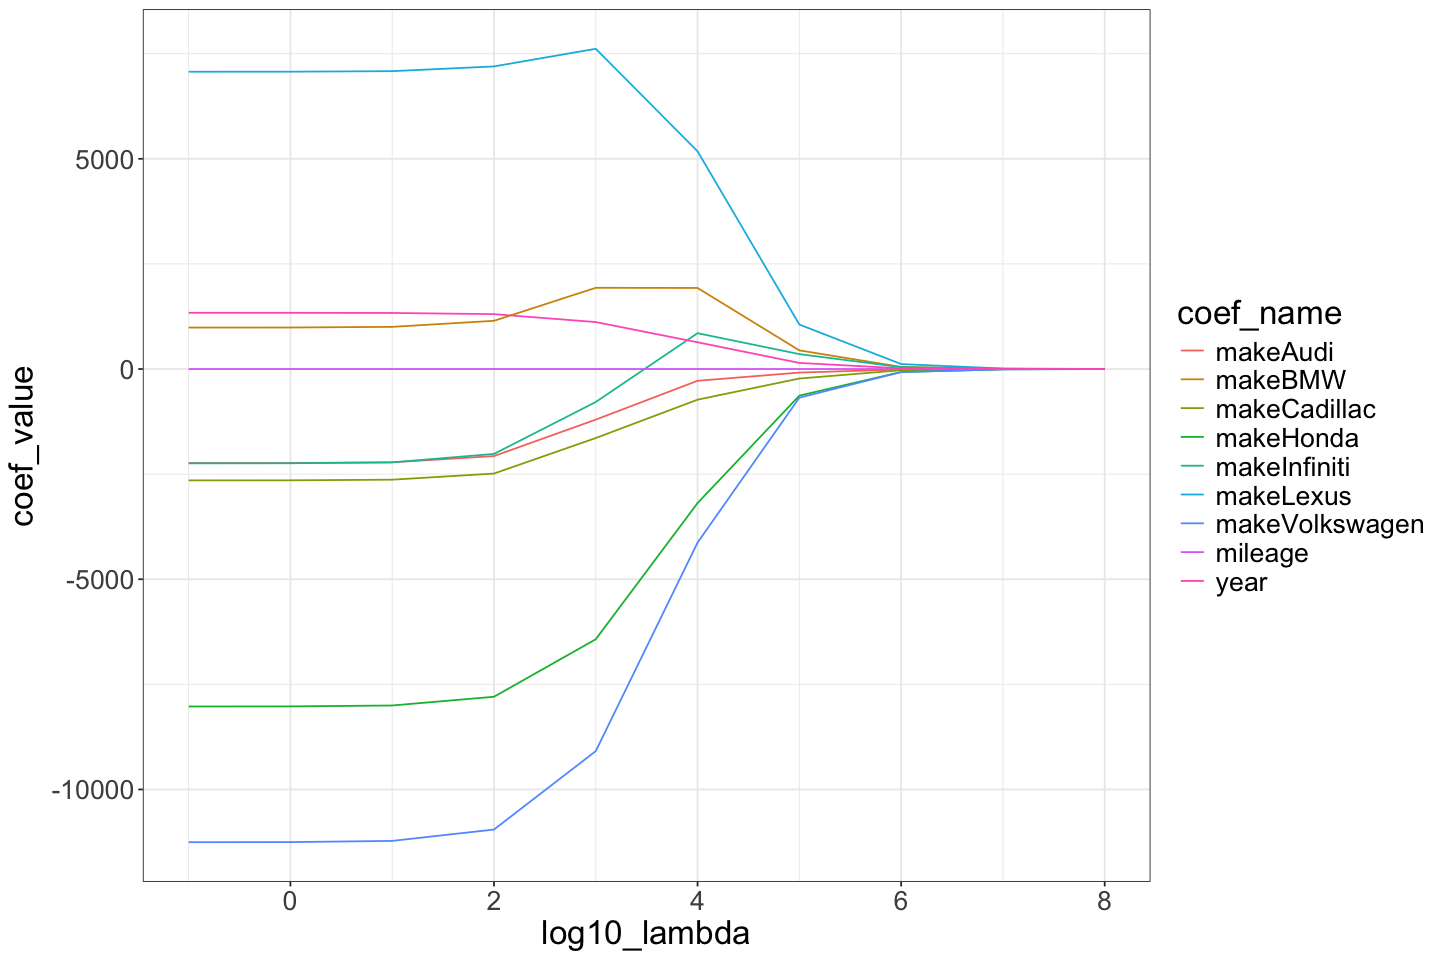

In [71]:
# Your code here!

# START answer

coef_plot_df = map2_dfr(
  coef_list, 
  lambdas, 
  function(coefs, lambda) {
    coef_matrix = as.matrix(coefs)
    coef_df = tibble(
      coef_name = row.names(coef_matrix), 
      coef_value = coef_matrix, 
      log10_lambda=log10(lambda)
    )
    coef_df
  }
)

coef_plot_df %>%
  filter(coef_name != '(Intercept)') %>%
  ggplot() +
  geom_line(aes(x=log10_lambda, y=coef_value, color=coef_name))

# The coefficients decrease as a function of lambda.

# END answer

## 🚀 Exercise 6

Repeat the previous model fitting and plotting exercises using lasso instead of ridge. How do the lasso and ridge plots differ?

> The `lasso_lm` function will come in handy!

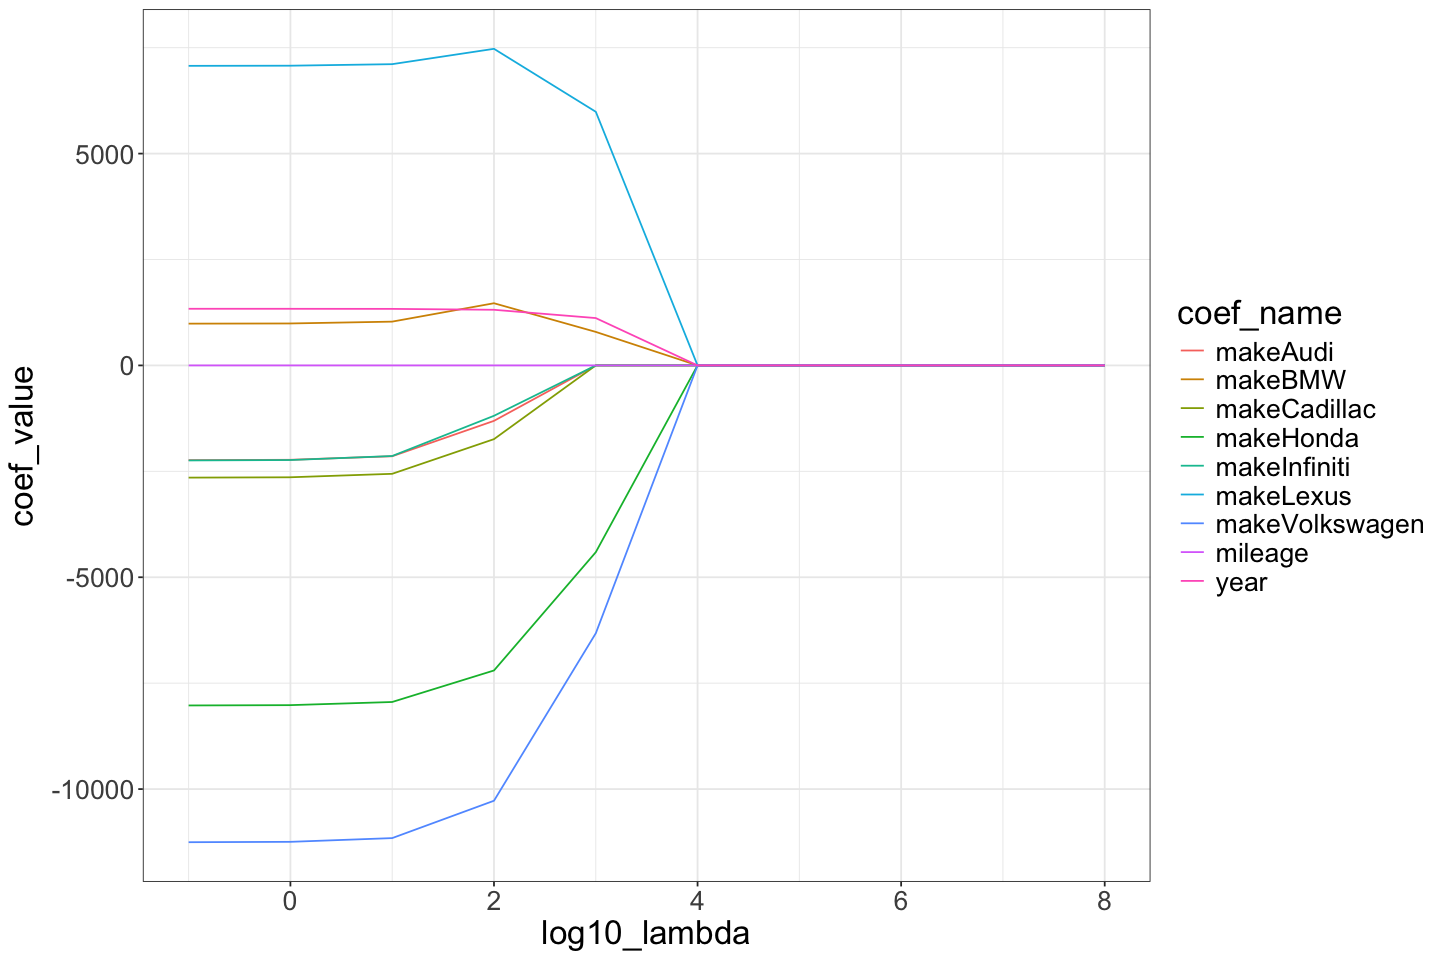

In [72]:
# Your code here!

# START answer

lambdas = 10^seq(-1, 8, by=1)
coef_list = list()

for (l in lambdas) {
  model = lasso_lm(price ~ ., data=cars, lambda=l)
  coef_list = c(coef_list, coef(model))
}

coef_plot_df = map2_dfr(
  coef_list, 
  lambdas, 
  function(coefs, lambda) {
    coef_matrix = as.matrix(coefs)
    coef_df = tibble(
      coef_name = row.names(coef_matrix), 
      coef_value = coef_matrix, 
      log10_lambda=log10(lambda)
    )
    coef_df
  }
)

coef_plot_df %>%
  filter(coef_name != '(Intercept)') %>%
  ggplot() +
  geom_line(aes(x=log10_lambda, y=coef_value, color=coef_name))

# Some coefficients get "zeroed-out" before others. The coefficient 
# magnitudes do not asymptotically move towards zero.

# END answer